# Synthetic Data

* Is data that mimics the real-world patterns generated through machine learning algorithms.

* It is information that's artificially manufactured rather than generated by real-world events. It's created algorithmically and is used as a stand-in for test data sets of production or operational data, to validate mathematical models and to train machine learning models.

# **Gaussian distribution** (Normal distribution)

* is a continuous probability distribution that is widely used in statistical modeling and Machine Learning.

* It is a bell-shaped curve that is symmetrical around its mean and is characterized by its mean and standard deviation.

# **Uniform Distribution** (Rectangular Distribution)

* It has a flat shape that is equal across the entire range of values, which means that every value has the same probability of occurring.

# **Covariance**
* is a measured use to determine how much variable change in randomly. The covariance is a product of the units of the two variables.

***Example:***

1500 instances - 0 or 1 binary

class 1 3  instances Gaussian distribution -[6,14],[10,6][14,14] = 750

class 0 - Uniform distribution - 20 = 750 instances



Note: *Any linear combination of the variables has a univariate normal distribution. Any conditional distribution for a subset of the variables conditional on known values for another subset of variables is a multivariate distribution.*

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
#The np. random. random() function is used to generate random numbers in the interval of [0.0, 1.0)

from numpy.random import random

In [4]:
N=1500

In [5]:
mean1=[6,14]

In [6]:
mean2=[10,6]

In [7]:
mean3=[14,14]

In [8]:
cov=[[3.5,0],[0,3.5]]

In [9]:
cov

[[3.5, 0], [0, 3.5]]

In [10]:
#  A random seed specifies the start point when a computer generates a random number sequence

np.random.seed(50)

In [11]:
# multivariate_normal () is a generalization of the one-dimensional normal distribution to higher dimensions.

X=np.random.multivariate_normal(mean1, cov, int(N/6))

In [12]:
X.shape

(250, 2)

In [13]:
X= np.concatenate((X, np.random.multivariate_normal(mean2, cov, int(N/6))))

In [14]:
X.shape

(500, 2)

In [15]:
X= np.concatenate((X, np.random.multivariate_normal(mean3, cov, int(N/6))))

In [16]:
X.shape

(750, 2)

In [17]:
X=np.concatenate((X, 20*np.random.rand(int(N/2), 2)))

In [18]:
X.shape

(1500, 2)

In [19]:
X

array([[ 3.0808485 , 13.94204621],
       [ 4.83834929, 11.2600208 ],
       [ 8.64150932, 13.10811583],
       ...,
       [17.10881966,  8.27100981],
       [ 4.63522923,  4.47963684],
       [ 7.45080691,  0.31260003]])

In [20]:
y=np.concatenate((np.ones(int(N/2)), np.zeros(int(N/2))))

In [21]:
y

array([1., 1., 1., ..., 0., 0., 0.])

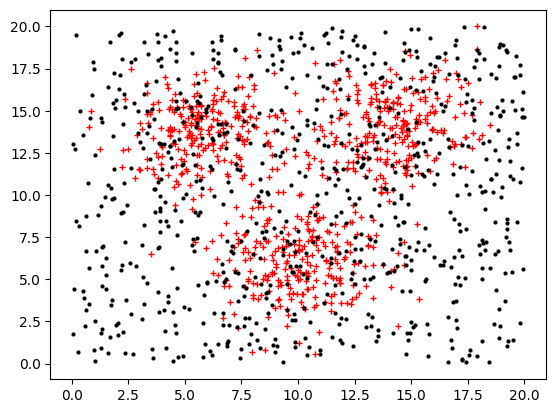

In [22]:
plt.plot(X[:int(N/2), 0], X[:int(N/2),1], 'r+', X[int(N/2):,0],X[int(N/2):,1],'k.', ms=4)

**Training and Test set creation**

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
y.shape

(1500,)

In [25]:
X.shape

(1500, 2)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=11)

In [27]:
X_train.shape

(1200, 2)

In [28]:
X_test.shape

(300, 2)

In [29]:
X_train

array([[ 4.62728194, 15.56260526],
       [ 7.35742367, 13.61166005],
       [ 7.35682734,  2.09827722],
       ...,
       [ 6.7036683 ,  2.29622476],
       [ 7.059329  , 10.21785598],
       [14.99484932,  6.13975097]])

In [30]:
#linear regression model
#python and excel
#github

#Training the model

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
linear_regression=LinearRegression()

In [33]:
linear_regression

LinearRegression()

In [34]:
linear_regression.fit(X_train, y_train)

LinearRegression()

In [37]:
# Predictions on training data

y_pred_train = linear_regression.predict(X_train)

In [38]:
# # Predictions on test data

y_pred_test = linear_regression.predict(X_test)

In [39]:
from sklearn.metrics import mean_squared_error

In [40]:
# Mean squared error on training set

train_mse = mean_squared_error(y_train, y_pred_train)

In [41]:
train_mse

0.2460352668931399

In [42]:
# Mean squared error on testing set

test_mse = mean_squared_error(y_test, y_pred_test)

In [43]:
test_mse

0.2480019737647577

>Both the train and test MSE values are relatively low, which suggests that the:

*   linear regression model performs reasonably well on both the training and test data.
*   The small difference between the train and test MSE values indicates that the model is not overfitting and generalizes well to unseen data.













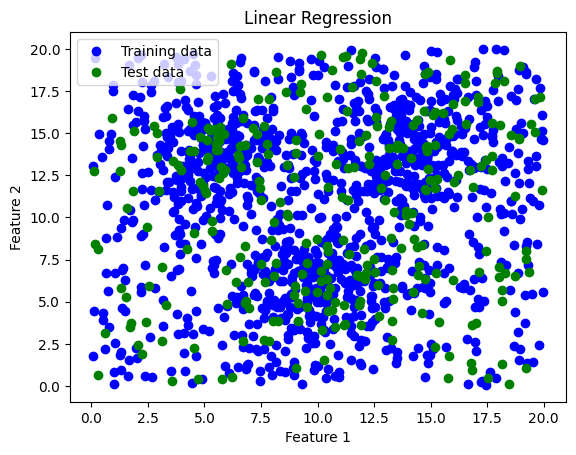

In [44]:
plt.figure()
plt.plot(X_train[:, 0], X_train[:, 1], 'bo', label='Training data')
plt.plot(X_test[:, 0], X_test[:, 1], 'go', label='Test data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linear Regression')
plt.legend()
plt.show()